In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
from astropy.io import fits
import scipy.interpolate
from scipy.interpolate import splev, splrep
from scipy import interpolate
import scipy.interpolate as spi

In [4]:
def new_degrade_R(input_wl, input_fl, wl_range, Res):
    ''' using established routine from the python module “coronagraph”
    '''
    import coronagraph as cg
    lowres_wl, lowres_dwl = cg.noise_routines.construct_lam(wl_range[0], wl_range[1], Res=Res)
    lowres_fl = cg.downbin_spec(input_fl, input_wl, lowres_wl, dlam=lowres_dwl)
    return lowres_wl, lowres_fl

['004.71462+51.89168_PSOJ004.7148+51.8918_J00185151+5153306_20130922_R=150_Q=OK.txt', '004.91362-37.41089_2MASSJ00193927-3724392_J00193927-3724392_20030904_R=75_Q=OK.txt', '006.92487+05.06158_PC0025+04_J00274197+0503417_20120920_R=120_Q=OK.txt', '007.79183+57.82675_WISEJ003110.04+574936.3_J00311004+5749363_20120924_R=75_Q=OK.txt', '008.23267-44.08494_EROS-MPJ0032-4405_J00325584-4405058_20080815_R=120_Q=OK.txt', '008.34942-15.35858_2MASSJ00332386-1521309_J00332386-1521309_20081129_R=120_Q=OK.txt', '010.47721+13.69308_SDSSJ004154.54+134135.5_J00415453+1341351_20090124_R=120_Q=OK.txt', '011.70171+07.25492_2MASSJ00464841+0715177_J00464841+0715177_20080713_R=120_Q=OK.txt', '011.75442+68.06448_WISEPJ004701.06+680352.1_J00470106+6803521_20110721_R=120_Q=OK.txt', '014.67721-06.85664_2MASSWJ0058425-065123_J00584253-0651239_20080714_R=120_Q=OK.txt', '021.58788+14.46822_2MASSJ01262109+1428057_J01262109+14280569_20061208_R=120_Q=OK.txt', '026.88933+34.88645_2MASSWJ0147334+345311_J01473344+3453112_

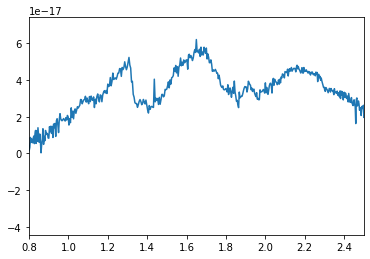

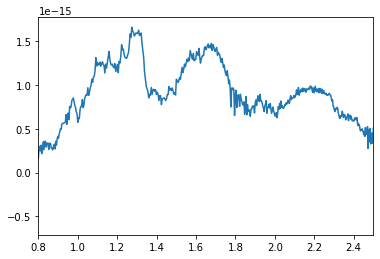

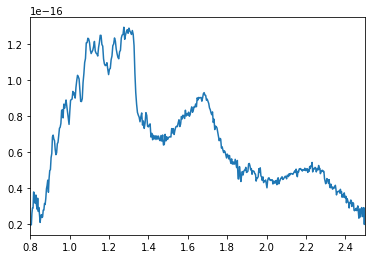

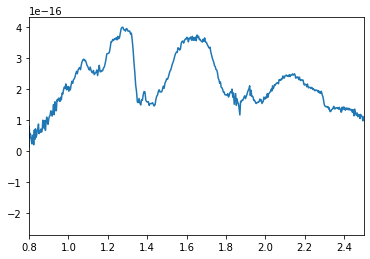

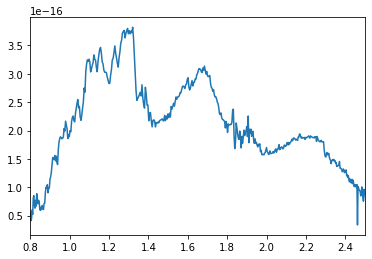

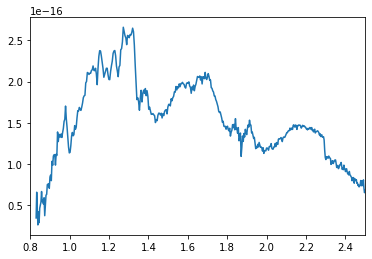

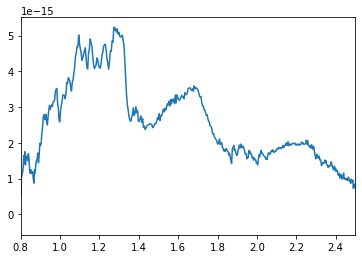

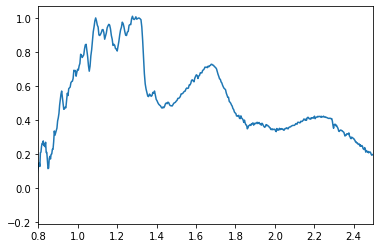

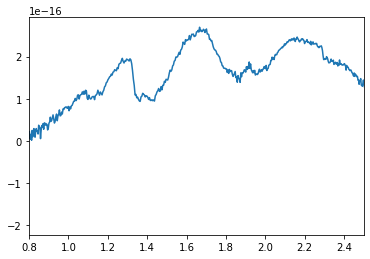

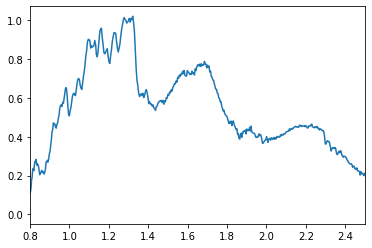

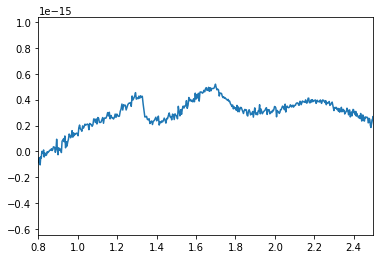

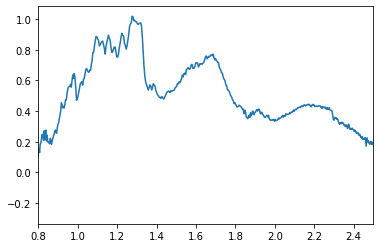

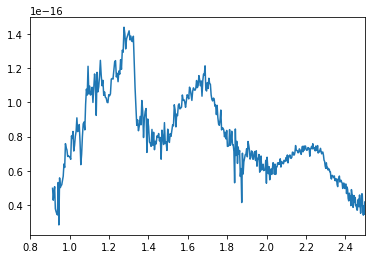

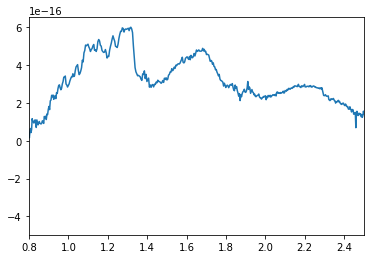

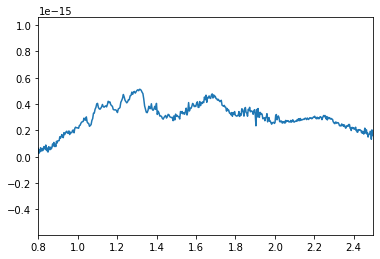

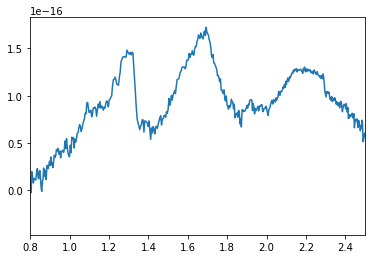

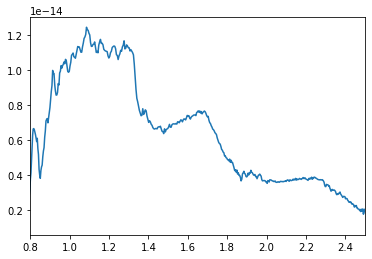

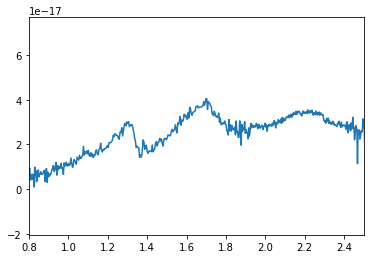

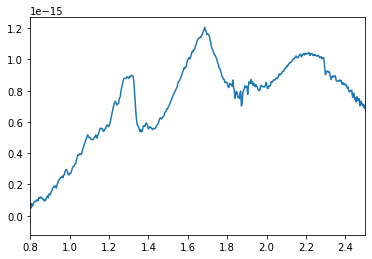

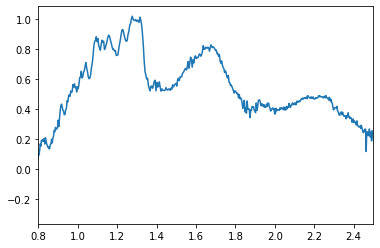

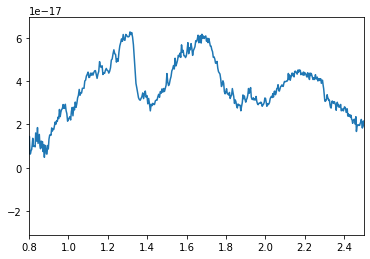

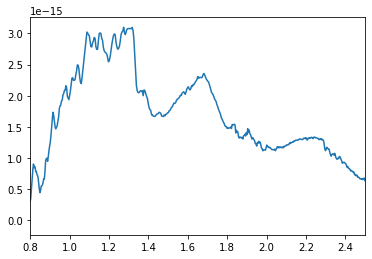

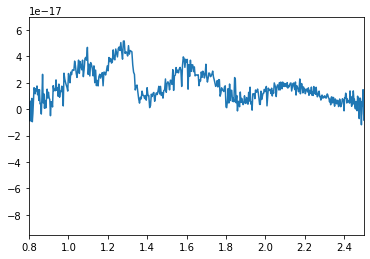

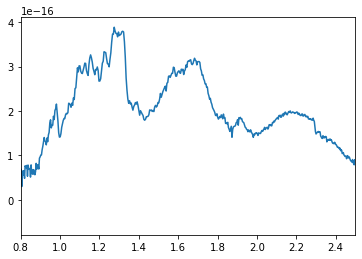

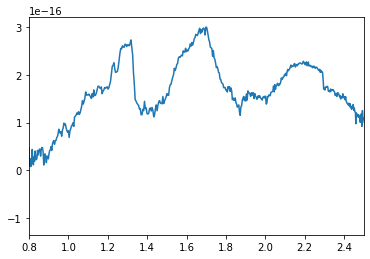

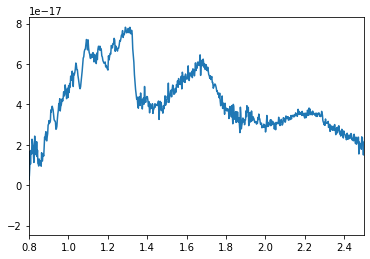

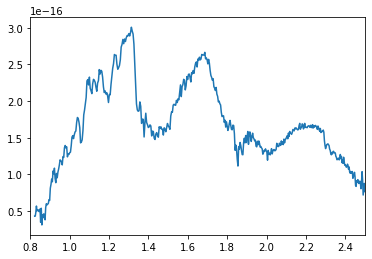

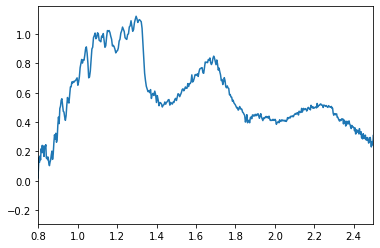

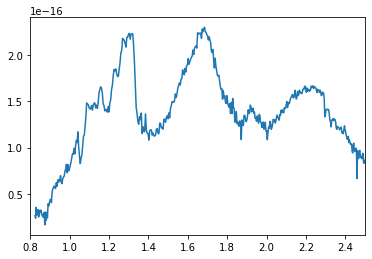

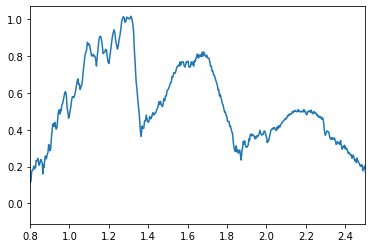

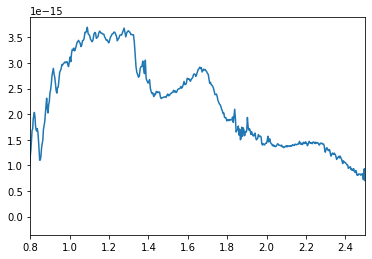

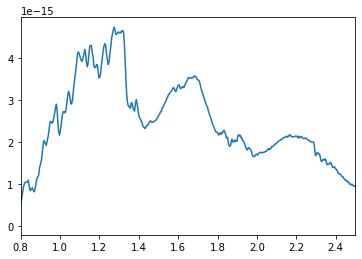

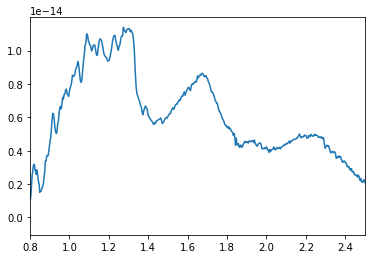

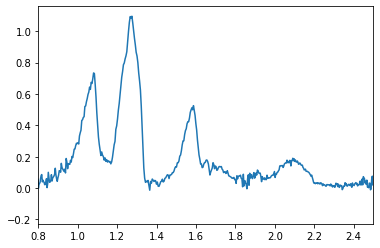

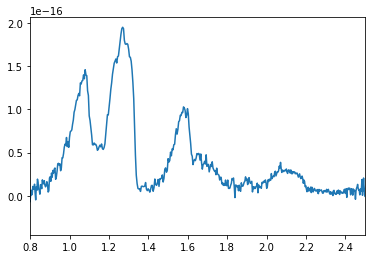

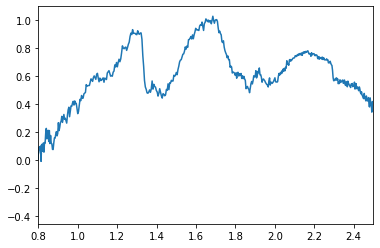

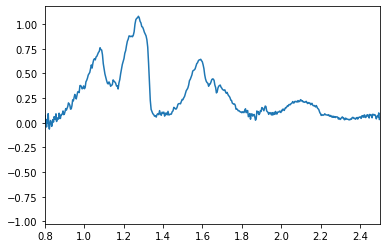

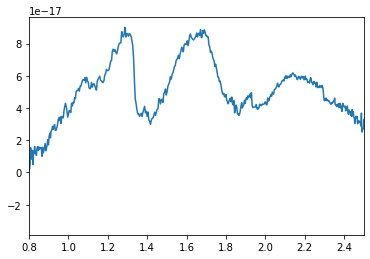

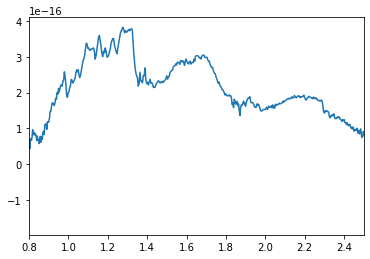

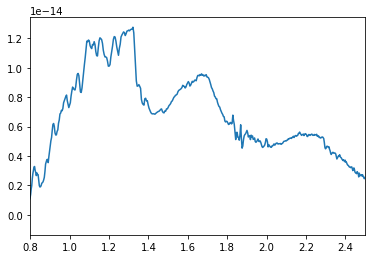

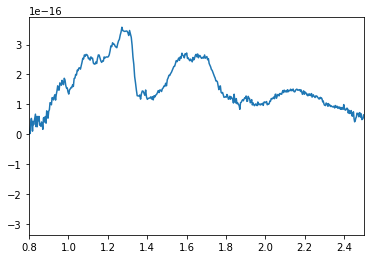

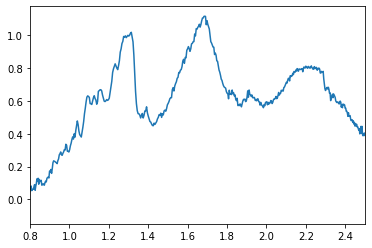

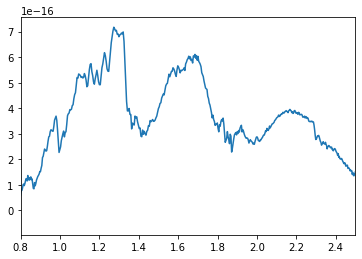

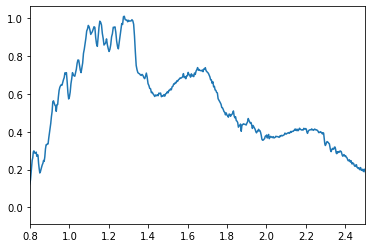

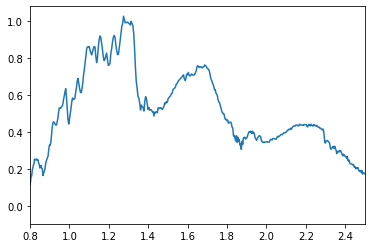

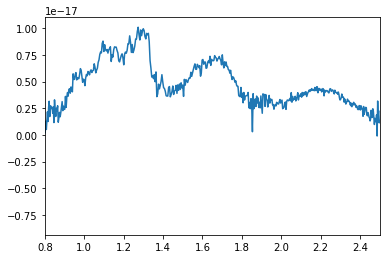

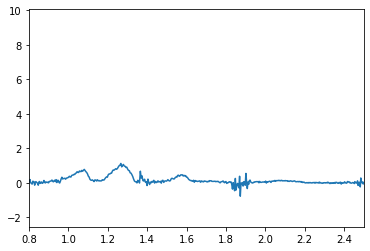

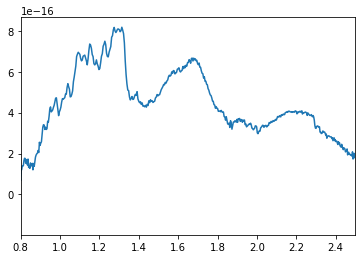

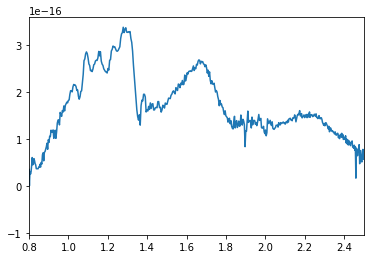

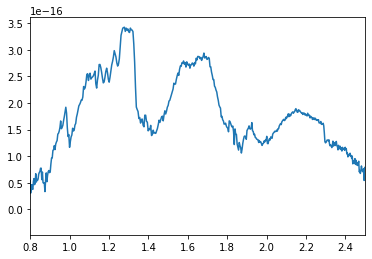

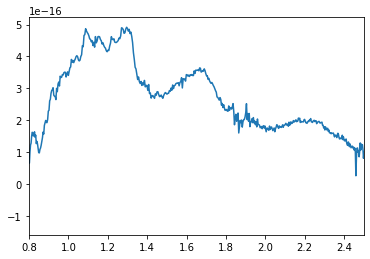

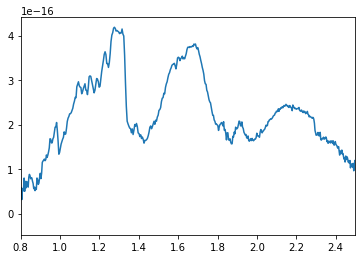

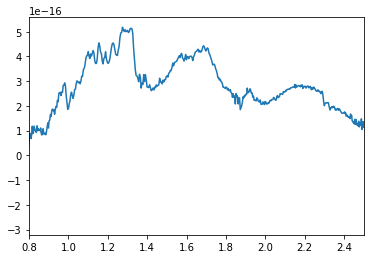

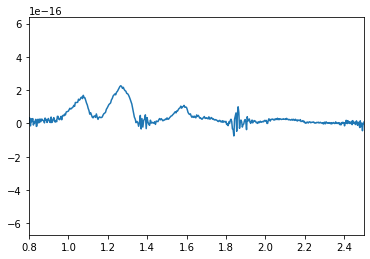

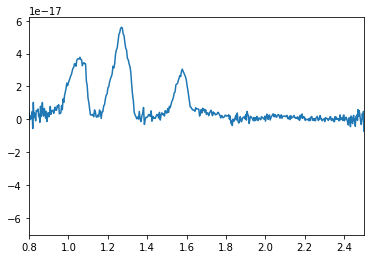

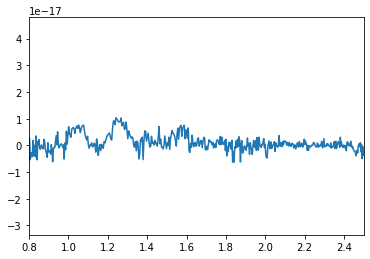

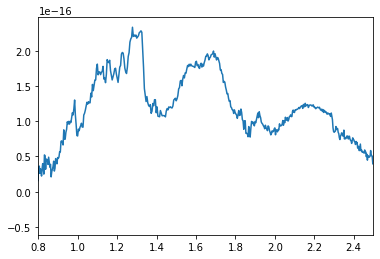

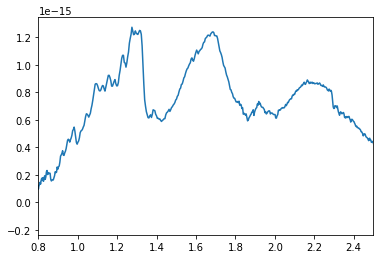

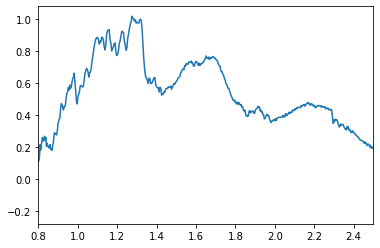

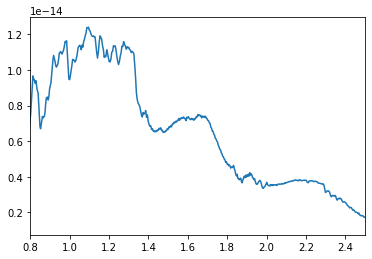

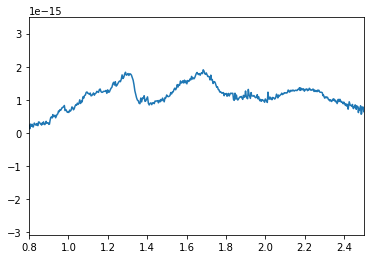

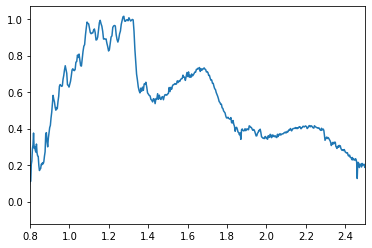

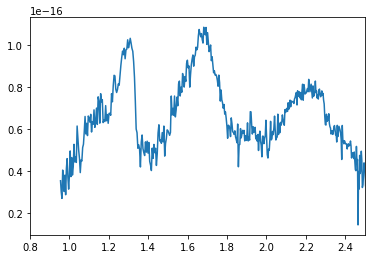

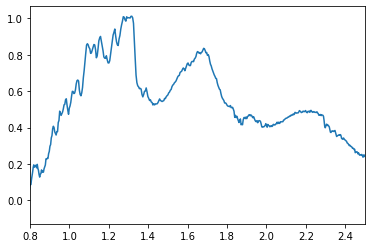

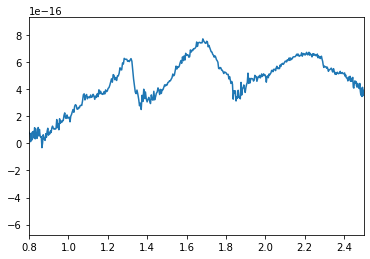

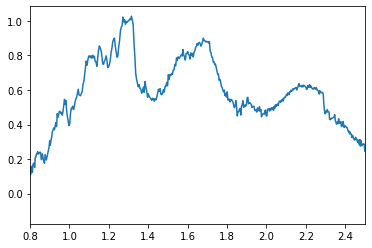

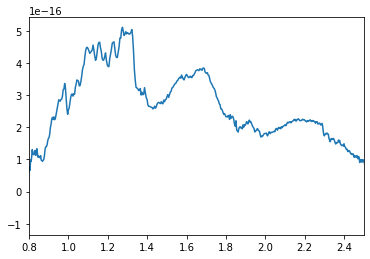

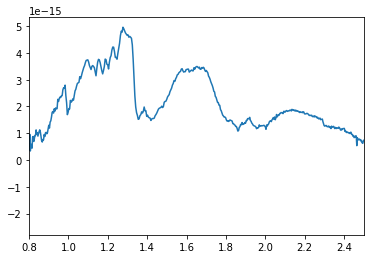

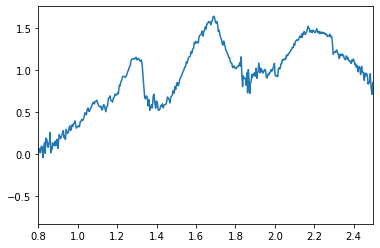

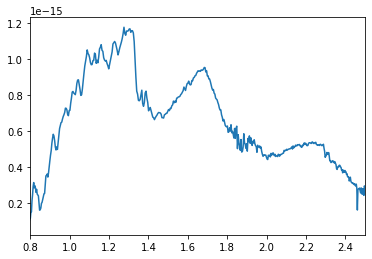

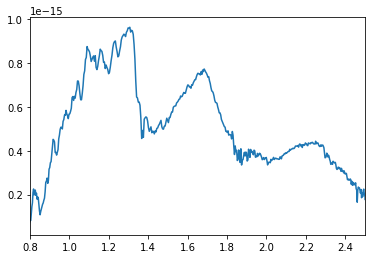

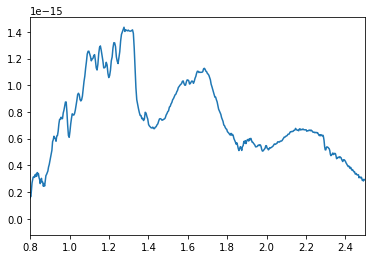

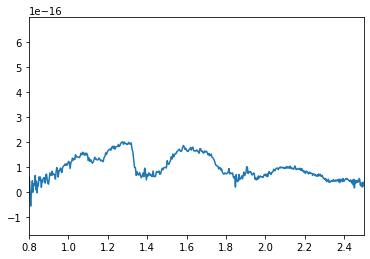

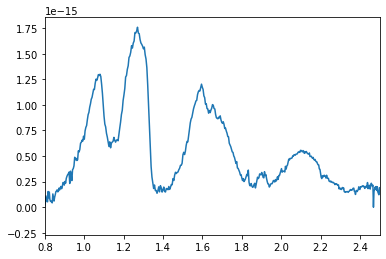

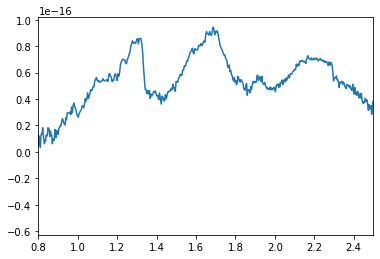

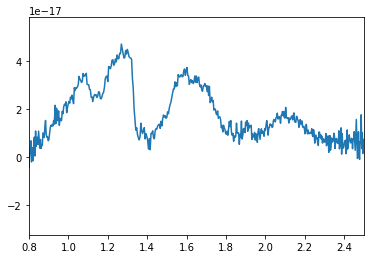

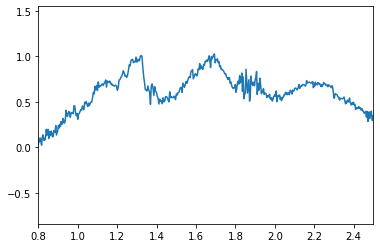

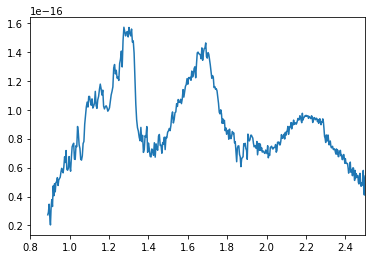

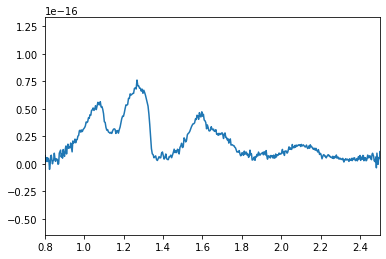

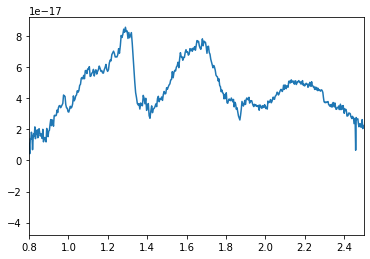

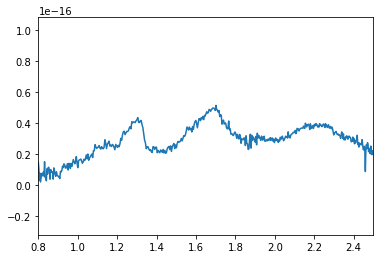

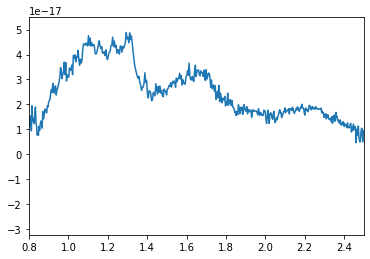

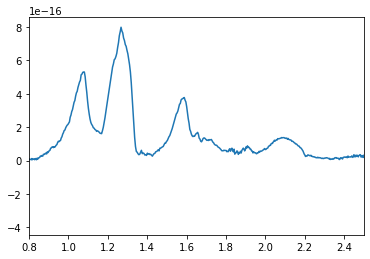

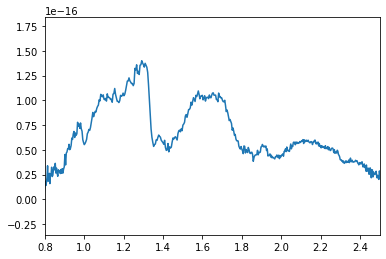

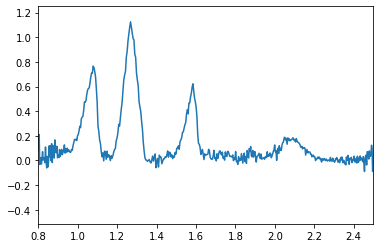

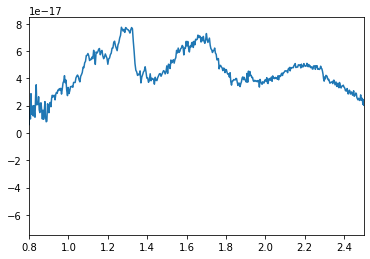

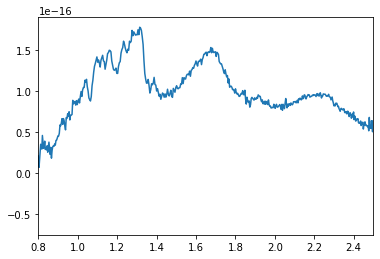

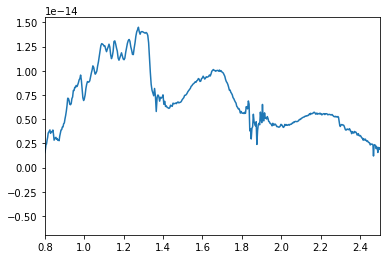

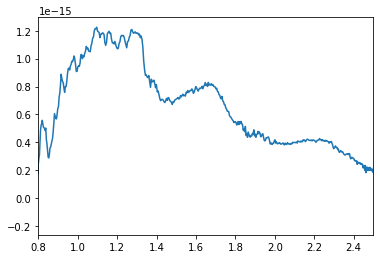

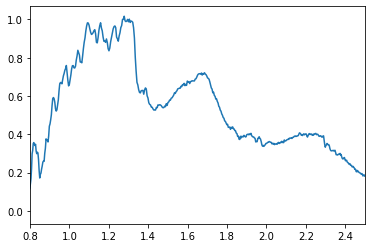

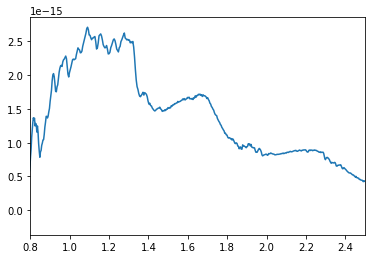

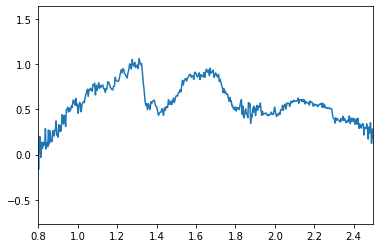

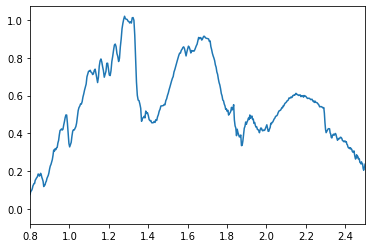

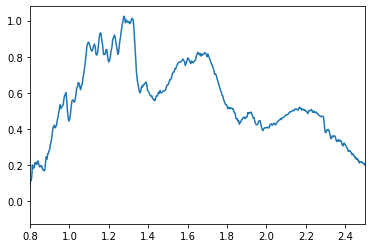

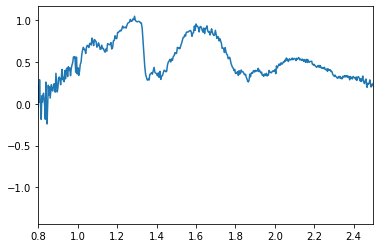

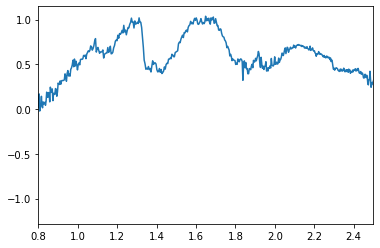

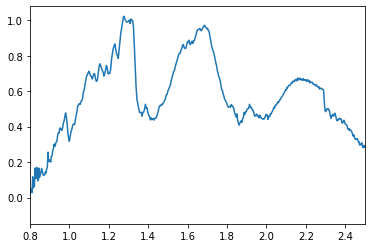

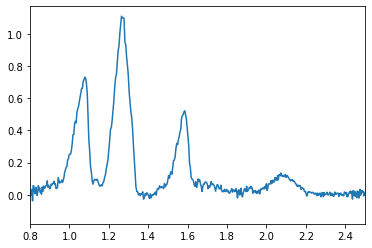

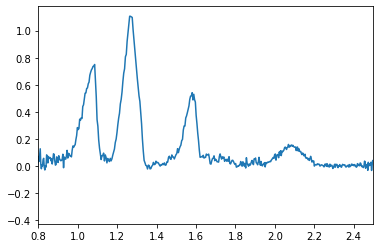

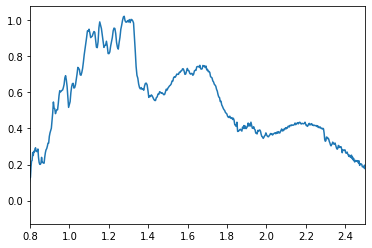

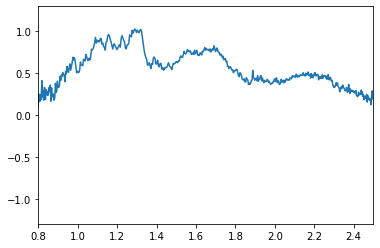

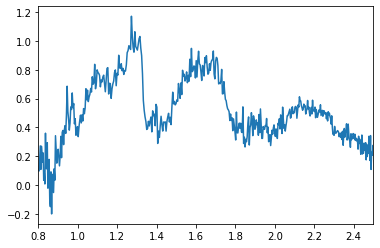

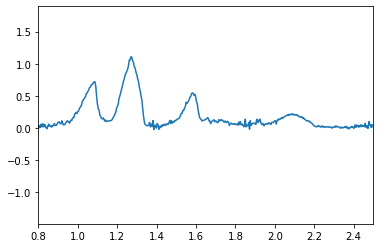

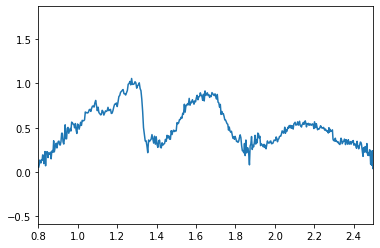

In [5]:
filenames1 = []
for f_name1 in os.listdir('/Users/bosse/Pictures/Observed Spectra txt files/'):
    if f_name1.endswith('.txt'):
            filenames1.append(f_name1)
print(filenames1)
filename1 = filenames1[:]
direc = '/Users/bosse/Pictures/Observed Spectra txt files/'
for i in range(len(filename1)):
    #with fits.open(direc+ str(filename1[i])) as hdul1:
    data = np.loadtxt(direc+ str(filename1[i]))
    w = data[:,0]
    f = data[:,1]
    plt.plot(w,f)
    plt.xlim(0.8, 2.5)
    plt.show();

In [ ]:
filenames1 = []
for f_name1 in os.listdir('/Users/bosse/Pictures/Primary Grid Models/'):
     filenames1.append(f_name1)
print(filenames1)
filename1 = filenames1[:]
direc = '/Users/bosse/Pictures/Primary Grid Models/'
for i in range(len(filename1)):
    #with fits.open(direc+ str(filename1[i])) as hdul1:
    data4 = np.loadtxt(direc+ str(filename1[i]), skiprows = 2)
    w4 = data4[:,0]
    f4 = data4[:,1]
    plt.plot(w4,f4)
    plt.xlim(0.8, 2.5)
    plt.show();

In [ ]:
filenames1 = []
for f_name1 in os.listdir('/Users/bosse/Pictures/Observed Spectra fits files/'):
    if f_name1.endswith('.fits'):
            filenames1.append(f_name1)
print(filenames1)
filename1 = filenames1[:]
direc = '/Users/bosse/Pictures/Observed Spectra fits files/'
for i in range(len(filename1)):
    with fits.open(direc + str(filename1[i])) as hdul1:
    #data = np.loadtxt(direc+ str(filename1[i]))
        data2 = hdul1[0].data
        w2 = data2[0]
        f2 = data2[1]
        plt.plot(w2,f2)
        plt.show();
print()

In [6]:
teff_grid = np.array([800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400])
num_teff = len(teff_grid)
logg_grid = np.array([4,4.5,5,5.5])
num_logg = len([logg_grid])
logg_dict = {4:"100",
            4.5:"300",
            5:"1000",
            5.5:"3000"}
f_sed_dict = {1:"f1",
             2:"f2",
             3:"f3",
             4:"f4",
             10:"nc"}
f_sed_grid = np.array([1,2,3,4,10])
num_f_sed = len([f_sed_grid])
num_model = num_teff * num_logg * num_f_sed
grid_param = []
for teff in teff_grid:
    for logg in logg_grid:
        for f in f_sed_grid:
            grid_param.append([teff, logg, f])
grid_param = np.array(grid_param)
print(grid_param)
N = len(grid_param)
print(N)

[[8.0e+02 4.0e+00 1.0e+00]
 [8.0e+02 4.0e+00 2.0e+00]
 [8.0e+02 4.0e+00 3.0e+00]
 ...
 [2.4e+03 5.5e+00 3.0e+00]
 [2.4e+03 5.5e+00 4.0e+00]
 [2.4e+03 5.5e+00 1.0e+01]]
340


In [8]:
#Load obsevred spectra file 
data_folder = '/Users/bosse/Pictures/Observed Spectra fits files/'

hdul1 = fits.open(data_folder + 'Ross458C_0.5prism_2015jul07.fits')[0].data
w_data = hdul1[0]
f_data = hdul1[1]
u_data = hdul1[2]
id_good = np.where((np.isnan(f_data) == False) & (u_data != 0) & (w_data > 0.8) & (w_data < 2.5))
w_data = w_data[id_good]
f_data = f_data[id_good]
u_data = u_data[id_good]
num_pixels = len(w_data)
# Defined image arrays 
C_k_array = np.ones(N) * np.nan
G_k_array = np.ones(N) * np.nan
#Load model data into a for loop
#for index in range(len(grid_param)):
for index in range(N):
    teff, logg, f = grid_param[index]
    Model_folder = '/Users/bosse/Pictures/Primary Grid Models/'
# Load Model
    try:
        model_array = np.genfromtxt(Model_folder + "sp_t%dg%s%s"%(teff, logg_dict[logg], f_sed_dict[f]), skip_header = 2)
        w_model = model_array[:,0]
        f_model = model_array[:,1]
    except OSError or FileNotFoundError:
#Downgrade Resolution then Model Interpolation
        print("sp_t%dg%s%s not there"%(teff, logg_dict[logg], f_sed_dict[f]))
        continue
    (new_w_model, new_f_model) = new_degrade_R(input_wl = w_model, input_fl = f_model, wl_range = [0.8,2.5], Res = 100)
    intfunc = spi.interp1d(new_w_model, new_f_model, fill_value="extrapolate")
    f_model_interp = intfunc(w_data)
#Compute C_k
    C_knum = 0
    for i in range(num_pixels):
        v = f_data[i] * f_model_interp[i] / u_data[i]**2
        C_knum = C_knum + v
    C_kden = 0
    for i in range(num_pixels):
        v2 = (f_model_interp[i]**2)/(u_data[i]**2)
        C_kden = C_kden + v2
    C_k = C_knum/C_kden
    G_k = 0 
    for i in range(num_pixels):
        v3 = ((f_data[i] - C_k * f_model_interp[i]) / u_data[i])**2
        G_k = G_k + v3
    C_k_array[index] = C_k
    G_k_array[index] = G_k
print(C_k_array, G_k_array)

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]


sp_t800g100f1 not there
sp_t800g100f3 not there
sp_t800g100f4 not there
sp_t900g100f3 not there
sp_t900g100f4 not there
sp_t900g1000f1 not there
sp_t1000g100f1 not there
sp_t1000g100f3 not there
sp_t1000g100f4 not there
sp_t1000g300f1 not there
sp_t1200g1000f1 not there
sp_t1200g1000f2 not there
sp_t1300g300f1 not there
sp_t1400g100f1 not there
sp_t1400g1000f1 not there
sp_t1500g100f1 not there
sp_t1500g100f2 not there
sp_t1500g100f3 not there
sp_t1500g100f4 not there
sp_t1500g300f2 not there
sp_t1600g100f1 not there
sp_t1600g100f2 not there
sp_t1600g100f4 not there
sp_t1600g300f1 not there
sp_t1600g3000f1 not there
sp_t1600g3000f2 not there
sp_t1600g3000f3 not there
sp_t1700g100f1 not there
sp_t1700g100f2 not there
sp_t1700g100f4 not there
sp_t1700g1000f1 not there
sp_t1800g100f1 not there
sp_t1800g100f3 not there
sp_t1800g3000f2 not there
sp_t1900g100f1 not there
sp_t1900g100f3 not there
sp_t1900g100f4 not there
sp_t2000g100f1 not there
sp_t2000g100f3 not there
sp_t2000g100f4 not the

In [ ]:
#C_knum = np.sum(f_data * f_model_interp / u_data**2)

In [7]:
direc = '/Users/bosse/Pictures/Observed Spectra txt files/'
for i in range(len(filename1)):
    #with fits.open(direc+ str(filename1[i])) as hdul1:
    data = np.loadtxt(direc+ str(filename1[i]))
    w_data = data[:,0]
    f_data = data[:,1]
    u_data = data[:,2]
    id_good = np.where((np.isnan(f_data) == False) & (u_data != 0) & (w_data > 0.8) & (w_data < 2.5))
    w_data = w_data[id_good]
    f_data = f_data[id_good]
    u_data = u_data[id_good]
    num_pixels = len(w_data)
# Defined image arrays 
    C_k_array = np.ones(N) * np.nan
    G_k_array = np.ones(N) * np.nan
#Load model data into a for loop
#for index in range(len(grid_param)):
    for index in range(N):
        teff, logg, f = grid_param[index]
        Model_folder = '/Users/bosse/Pictures/Primary Grid Models/'
# Load Model
        try:
            model_array = np.genfromtxt(Model_folder + "sp_t%dg%s%s"%(teff, logg_dict[logg], f_sed_dict[f]), skip_header = 2)
            w_model = model_array[:,0]
            f_model = model_array[:,1]
        #except OSError or FileNotFoundError:
#Downgrade Resolution then Model Interpolation
            #print("sp_t%dg%s%s not there"%(teff, logg_dict[logg], f_sed_dict[f]))
            #continue
            (new_w_model, new_f_model) = new_degrade_R(input_wl = w_model, input_fl = f_model, wl_range = [0.8,2.5], Res = 100)
            intfunc = spi.interp1d(new_w_model, new_f_model, fill_value="extrapolate")
            f_model_interp = intfunc(w_data)
            C_knum = 0
            for i in range(num_pixels):
                v = f_data[i] * f_model_interp[i] / u_data[i]**2
                C_knum = C_knum + v
            C_kden = 0
            for i in range(num_pixels):
                v2 = (f_model_interp[i]**2)/(u_data[i]**2)
                C_kden = C_kden + v2
            C_k = C_knum/C_kden
            G_k = 0 
            for i in range(num_pixels):
                v3 = ((f_data[i] - C_k * f_model_interp[i]) / u_data[i])**2
                G_k = G_k + v3
            C_k_array[index] = C_k
            G_k_array[index] = G_k
        except OSError or FileNotFoundError:
#Downgrade Resolution then Model Interpolation
            print("sp_t%dg%s%s not there"%(teff, logg_dict[logg], f_sed_dict[f]))
            continue
    #print(C_k_array, G_k_array)
    teff_best, logg_best, f_sed_best = grid_param[np.nanargmin(G_k_array)]
    model_array_best = np.genfromtxt(Model_folder + "sp_t%dg%s%s"%(teff_best, logg_dict[logg_best], f_sed_dict[f_sed_best]), skip_header = 2)
    w_model_best = model_array_best[:,0]
    f_model_best = model_array_best[:,1]
    (new_w_model_best, new_f_model_best) = new_degrade_R(input_wl = w_model_best, input_fl = f_model_best, wl_range = [0.8,2.5], Res = 100)
    intfunc = spi.interp1d(new_w_model_best, new_f_model_best, fill_value="extrapolate")
    C_k_lowest = C_k_array[np.nanargmin(G_k_array)]
    f_model_interp = intfunc(w_data)*C_k_lowest
    plt.plot(w_data, f_model_interp, label = 'Interpolated Model')  
    plt.plot(w_data, f_data, label = 'Observed Spectra')
#plt.fill_between(w_data, f_data - u_data, f_data + u_data, color='red', alpha=0.3)
    plt.title("Interpolation of Model values over Observed Spectra")
    plt.title("Teff = %d , logg = %.1f , fsed = %s"%(teff_best, logg_best, f_sed_dict[f_sed_best]))
    plt.xlabel("Wavelength(Microns)")
    plt.ylabel("Flux")
    plt.legend()
    plt.show()

sp_t800g100f1 not there
sp_t800g100f3 not there
sp_t800g100f4 not there
sp_t900g100f3 not there
sp_t900g100f4 not there
sp_t900g1000f1 not there


KeyboardInterrupt: 

In [1]:
filename2 = []
directory = '/Users/bosse/Pictures/Observed Spectra fits files/'
for i in range(len(filename2)):
    hdul1 = fits.open(directory+ str(filename2[i]))
    w_data = hdul1[0]
    f_data = hdul1[1]
    u_data = hdul1[2]
    id_good = np.where((np.isnan(f_data) == False) & (u_data != 0) & (w_data > 0.8) & (w_data < 2.5))
    w_data = w_data[id_good]
    f_data = f_data[id_good]
    u_data = u_data[id_good]
    num_pixels = len(w_data)
# Defined image arrays 
    C_k_array = np.ones(N) * np.nan
    G_k_array = np.ones(N) * np.nan
#Load model data into a for loop
#for index in range(len(grid_param)):
    for index in range(N):
        teff, logg, f = grid_param[index]
        Model_folder2 = '/Users/bosse/Pictures/Primary Grid Models/'
# Load Model
        try:
            model_array = np.genfromtxt(Model_folder2 + "sp_t%dg%s%s"%(teff, logg_dict[logg], f_sed_dict[f]), skip_header = 2)
            w_model = model_array[:,0]
            f_model = model_array[:,1]
            (new_w_model, new_f_model) = new_degrade_R(input_wl = w_model, input_fl = f_model, wl_range = [0.8,2.5], Res = 100)
            intfunc = spi.interp1d(new_w_model, new_f_model, fill_value="extrapolate")
            f_model_interp = intfunc(w_data)
            C_knum = 0
            for i in range(num_pixels):
                v = f_data[i] * f_model_interp[i] / u_data[i]**2
                C_knum = C_knum + v
            C_kden = 0
            for i in range(num_pixels):
                v2 = (f_model_interp[i]**2)/(u_data[i]**2)
                C_kden = C_kden + v2
            C_k = C_knum/C_kden
            G_k = 0 
            for i in range(num_pixels):
                v3 = ((f_data[i] - C_k * f_model_interp[i]) / u_data[i])**2
                G_k = G_k + v3
            C_k_array[index] = C_k
            G_k_array[index] = G_k
        except OSError or FileNotFoundError:
#Downgrade Resolution then Model Interpolation
            print("sp_t%dg%s%s not there"%(teff, logg_dict[logg], f_sed_dict[f]))
            continue
    #print(C_k_array, G_k_array)
    teff_best, logg_best, f_sed_best = grid_param[np.nanargmin(G_k_array)]
    model_array_best = np.genfromtxt(Model_folder + "sp_t%dg%s%s"%(teff_best, logg_dict[logg_best], f_sed_dict[f_sed_best]), skip_header = 2)
    w_model_best = model_array_best[:,0]
    f_model_best = model_array_best[:,1]
    (new_w_model_best, new_f_model_best) = new_degrade_R(input_wl = w_model_best, input_fl = f_model_best, wl_range = [0.8,2.5], Res = 100)
    intfunc = spi.interp1d(new_w_model_best, new_f_model_best, fill_value="extrapolate")
    C_k_lowest = C_k_array[np.nanargmin(G_k_array)]
    f_model_interp = intfunc(w_data)*C_k_lowest
    plt.plot(w_data, f_model_interp, label = 'Interpolated Model')  
    plt.plot(w_data, f_data, label = 'Observed Spectra')
#plt.fill_between(w_data, f_data - u_data, f_data + u_data, color='red', alpha=0.3)
    plt.title("Interpolation of Model values over Observed Spectra")
    plt.title("Teff = %d , logg = %.1f , fsed = %s"%(teff_best, logg_best, f_sed_dict[f_sed_best]))
    plt.xlabel("Wavelength(Microns)")
    plt.ylabel("Flux")
    plt.legend()
    plt.show()

In [ ]:
plt.plot(w_data, f_model_interp, label = 'Interpolated Model')  
plt.plot(w_data, f_data, label = 'Observed Spectra')
#plt.fill_between(w_data, f_data - u_data, f_data + u_data, color='red', alpha=0.3)
plt.title("Interpolation of Model values over Observed Spectra")
plt.title("Teff = %d , logg = %.1f , fsed = %s"%(teff_best, logg_best, f_sed_dict[f_sed_best]))
plt.xlabel("Wavelength(Microns)")
plt.ylabel("Flux")
plt.legend()
plt.show()

In [ ]:
print(np.nanargmin(G_k_array))
print(np.nanmin(G_k_array))

In [ ]:
teff_best, logg_best, f_sed_best = grid_param[np.nanargmin(G_k_array)]

In [ ]:
C_k_lowest = C_k_array[np.nanargmin(G_k_array)]
print(C_k_lowest)

In [ ]:
model_array_best = np.genfromtxt(Model_folder + "sp_t%dg%s%s"%(teff_best, logg_dict[logg_best], f_sed_dict[f_sed_best]), skip_header = 2)
w_model_best = model_array_best[:,0]
f_model_best = model_array_best[:,1]
(new_w_model_best, new_f_model_best) = new_degrade_R(input_wl = w_model_best, input_fl = f_model_best, wl_range = [0.8,2.5], Res = 100)
intfunc = spi.interp1d(new_w_model_best, new_f_model_best, fill_value="extrapolate")
f_model_interp = intfunc(w_data)*C_k_lowest

In [ ]:
id_select = np.where((grid_param[:,1] == 4) & (grid_param[:,2] == 10))
print(id_select)

In [ ]:
plt.plot(grid_param[id_select,0].T, G_k_array[id_select], )
plt.show()

In [ ]:
intfunc2 = spi.interp1d(w4, f4, fill_value="extrapolate")
flux3 = intfunc2(w)

In [ ]:
plt.plot(w4, f4, label = "Model Values") 
plt.plot(w, flux3, label = 'Observed Spectra')       
plt.title("Interpolation of Model values over Observed Spectras")
plt.legend()
plt.show()

In [ ]:
def comp_to_models(model_array)
for data in hdul1:
    comp_to_models(hdul1)

In [ ]:
plt.plot(w_model, f_model, label = "Model Values") 
plt.plot(w_data, f_model_interp, label = 'Interpolated Model')  
plt.plot(w_data, f_data, label = 'Observed Spectra')       
plt.title("Interpolation of Model values over Observed Spectras")
plt.xlim(0.8,2.5)
plt.legend()
plt.show()

In [ ]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [ ]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
SDSS = get_pkg_data_filename('pm+HIP-912-80902_0.8prism_2012oct07.fits')

In [ ]:
fits.info(SDSS)

In [ ]:
SDSS_data = fits.getdata(SDSS, ext=0)

In [ ]:
plt.plot(SDSS_data[0], SDSS_data[1])

In [ ]:
w = SDSS_data[0]
f = SDSS_data[1]

In [ ]:
def new_degrade_R(input_wl, input_fl, wl_range, Res):
    ''' using established routine from the python module “coronagraph”
    '''
    import coronagraph as cg
    lowres_wl, lowres_dwl = cg.noise_routines.construct_lam(wl_range[0], wl_range[1], Res=Res)
    lowres_fl = cg.downbin_spec(input_fl, input_wl, lowres_wl, dlam=lowres_dwl)
    return lowres_wl, lowres_fl

In [ ]:
(new_w, new_f) = new_degrade_R(input_wl = w, input_fl = f, wl_range = [0.8,2.5], Res = 100)

In [ ]:
plt.plot(new_w, new_f)